## LD2L 15 by the data

For some time now, I have been thinking about how to pull interesting insights from LD2L and present them to the community. Below is some code I put together to do just that.

If you are interested in my bunk data extraction method, I will gladly DM you the repo on discord.

In [1]:
# import statements for data analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy.stats import mannwhitneyu, rankdata
import squarify # for treemaps

# machine learning imports
from sklearn.preprocessing import MinMaxScaler # for scaling data


#cleaning imports from custom module
import cleaning as clean

#magic word for producing visualizations in notebook
%matplotlib inline

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

# remove pandas truncation
pd.set_option('display.max_columns', None)

In [2]:
# this cell preprocesses the raw data for easier analysis
# some preprocesssing is done during file creation but these are the final steps
# and are season specific.

df = pd.read_csv('match_data_37/match_data_37.csv')
clean.clean_date(df)
clean.clean_medals(df)
clean.clean_teams(df)
#clean.clean_duration(df)
df.head()


,match_id,date,account_id,personaname,teamID,rank_tier,kills,assists,deaths,kills_per_min,kda,denies,gold,gold_per_min,gold_spent,hero_damage,damage_taken,hero_healing,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,last_hits,level,net_worth,tower_damage,xp_per_min,radiant_win,duration,patch,isRadiant,win,lose,total_gold,total_xp,obs_placed,sen_placed,rune_pickups,camps_stacked,stuns,creeps_stacked,firstblood_claimed,pings,teamfight_participation,roshans_killed,medal
0,6982865709,2023-01-22,147665746,Cheeseburger,Los Muertas,15,2,7,6,0.064865,1,11,466,408,11640,16940,18072,0,Outworld Destroyer,1,63,116,23,534,0,289,149,16,11966,1884,460,True,1850,51,True,1,0,12580,14183,2,0,5,0,69.722900,0,0,0.0,0.529412,1,C5
1,6982865709,2023-01-22,163983635,Turtles,Los Muertas,15,2,11,4,0.064865,2,6,482,408,12850,10692,14406,2268,Beastmaster,11,34,635,131,29,0,358,142,17,12532,6645,543,True,1850,51,True,1,0,12580,16742,0,0,1,0,16.250732,0,0,0.0,0.764706,0,C5
2,6982865709,2023-01-22,123736773,Space Cowboy,Los Muertas,15,1,4,9,0.032432,0,1,1322,207,5905,12385,13466,0,Skywrath Mage,206,77,77,77,29,38,357,19,12,6137,257,301,True,1850,51,True,1,0,6382,9280,0,1,3,2,2.006836,5,0,2.0,0.294118,0,C5
3,6982865709,2023-01-22,85398356,GRaff,Los Muertas,15,4,8,5,0.129730,2,3,1029,260,6945,8454,14722,6634,Treant Protector,244,39,180,1,36,0,356,27,15,5379,0,408,True,1850,51,True,1,0,8016,12580,13,20,4,0,37.857666,0,0,6.0,0.705882,0,C5
4,6982865709,2023-01-22,433544241,DaviruzZ,Los Muertas,23,8,6,0,0.259459,14,5,2090,520,14555,23986,19680,0,Phantom Lancer,174,36,131,63,147,24,947,196,19,16190,2753,642,True,1850,51,True,1,0,16033,19795,0,0,2,1,0.000000,5,0,17.0,0.823529,0,L3


### Player distribution

Something I really enjoy about LD2L is that a pretty even spread. The league overall centers at a Median or Archon 2 and an Average of Archon 1 at the end of the season. 65% of players are between Crusader 1 and Legend 3. 23 players were lower ranked than crusader 1 and 8 players were ranked higher than l3.

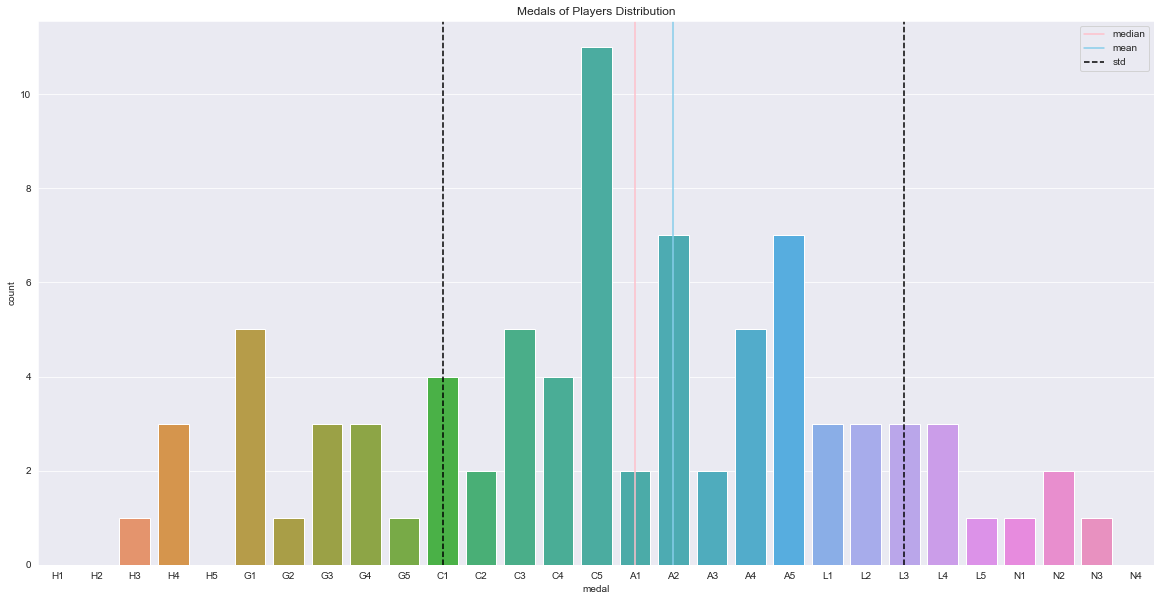

In [3]:
clean.ranks(df)

It is to be expected that higher ranked players have a higher win rate but something interesting in the data is that low rank players are outperforming the mid tier. This may be due to a lower player pool and likely High MMR and Low MMR players pairing up. This is something I would like to explore further in the future.

XPM, GPM and KDA follow the expected trend of higher ranked players having above measure of center scores that descend as ranks move down.



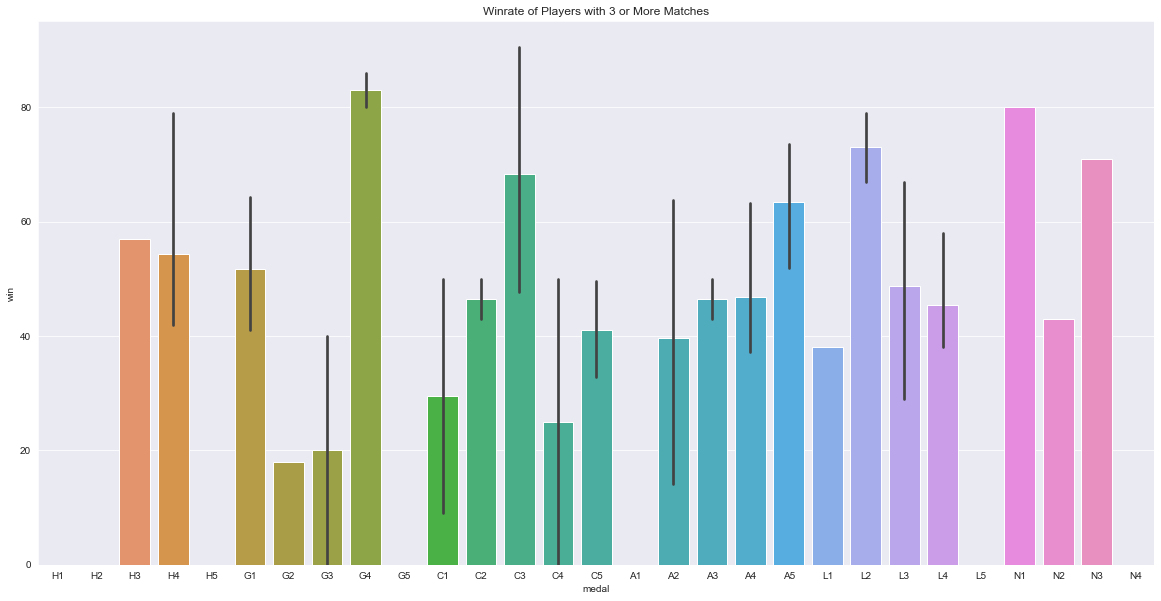

In [4]:
clean.three_plus(df)

In [5]:
clean.medals_winrate(df)

Low Rank Winrate:  50.08  +/-  23.77
Middle Rank Winrate:  48.37  +/-  21.58
High Rank Winrate:  55.0  +/-  16.06


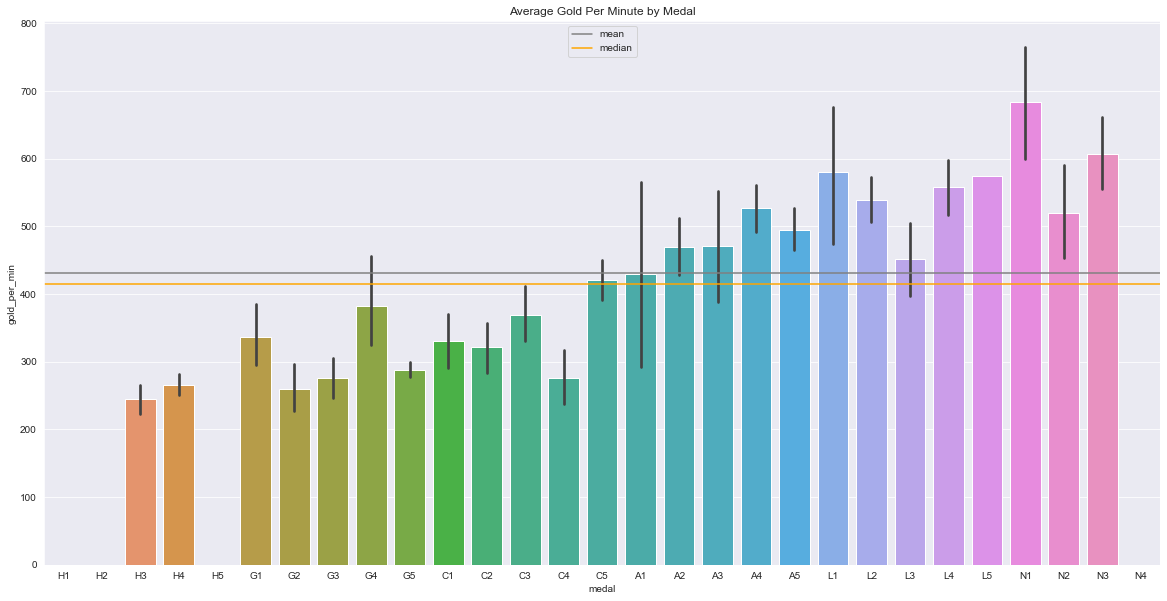

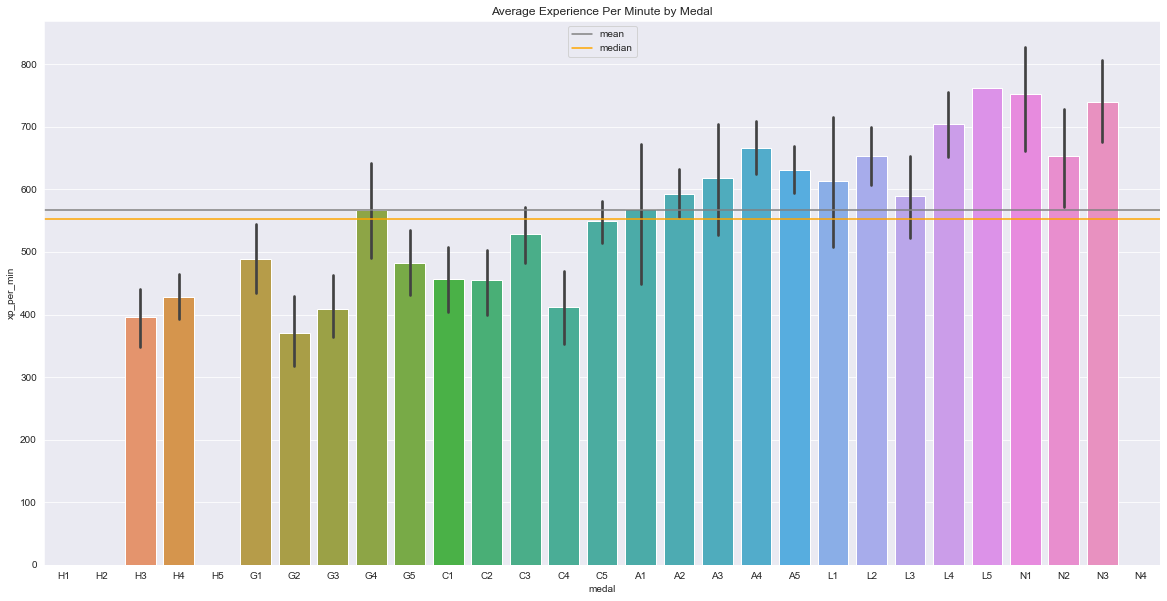

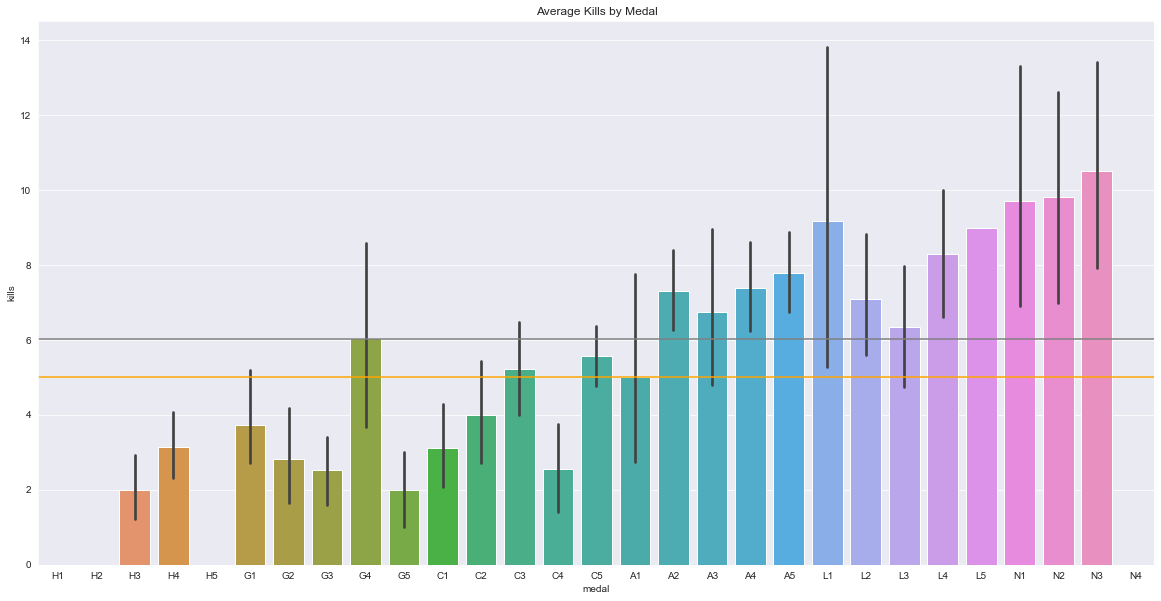

In [6]:
clean.xpmgpmkda(df)

Toxic players suck regardless of the circumstance. If you need to ping as much as the NPH, the disband should've happened before the game. NPH averaged 82 pings per game and capped at 217 pings in a single game.

The low ping accounts are either vocal or not calling out enough info but I will take silence over pinging any day.

Scrub is the only exception to the rule. He is a great player and very PMA. He is also a great person and I am glad to have him in my life.


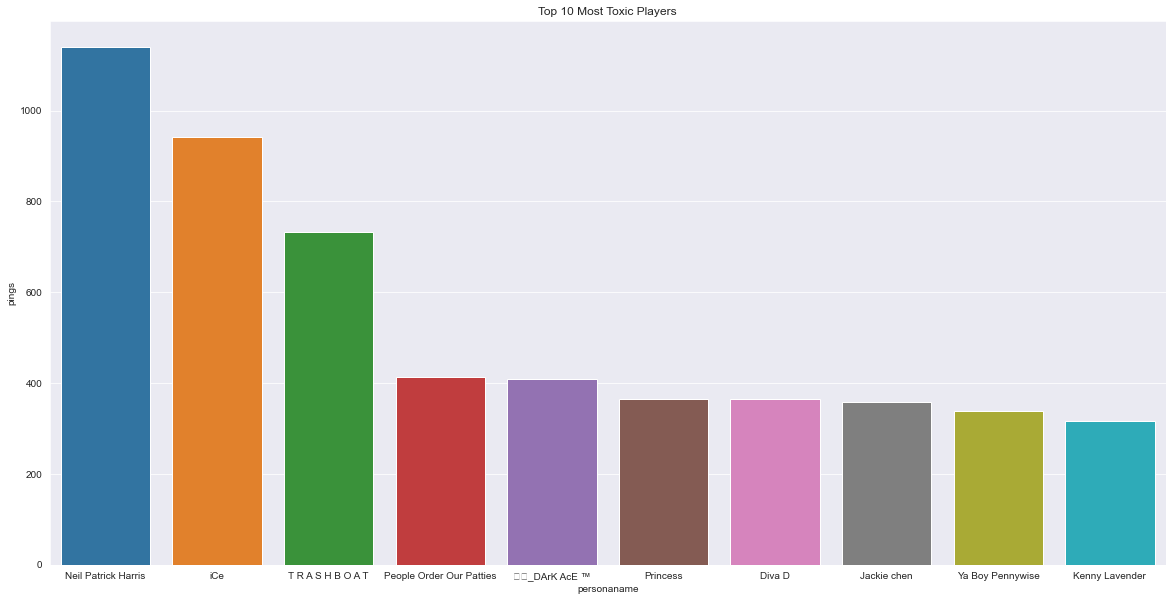

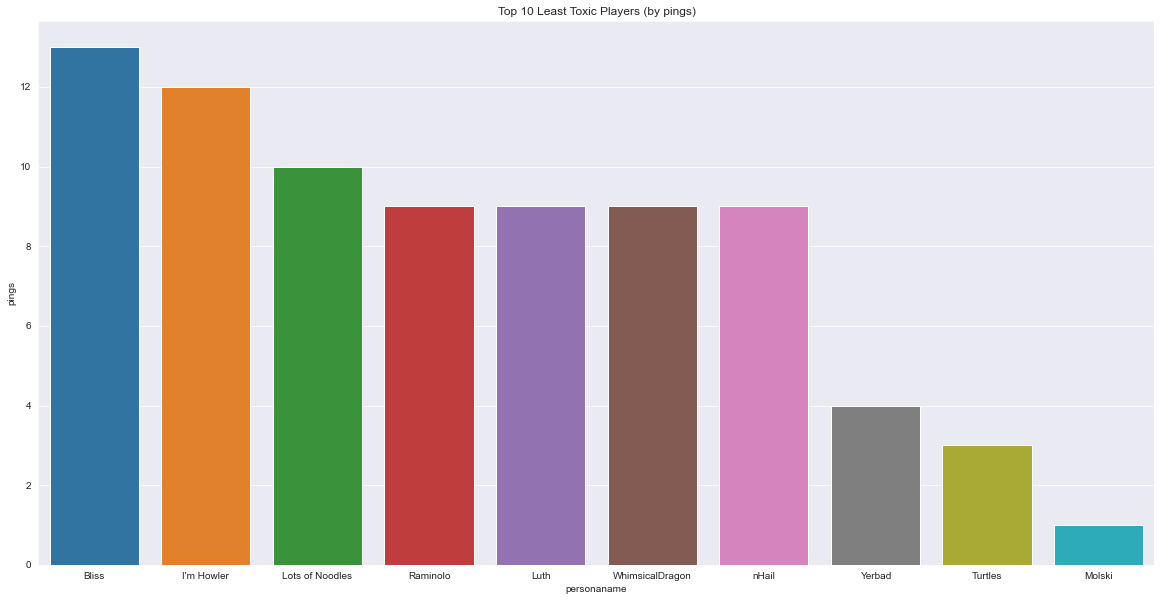

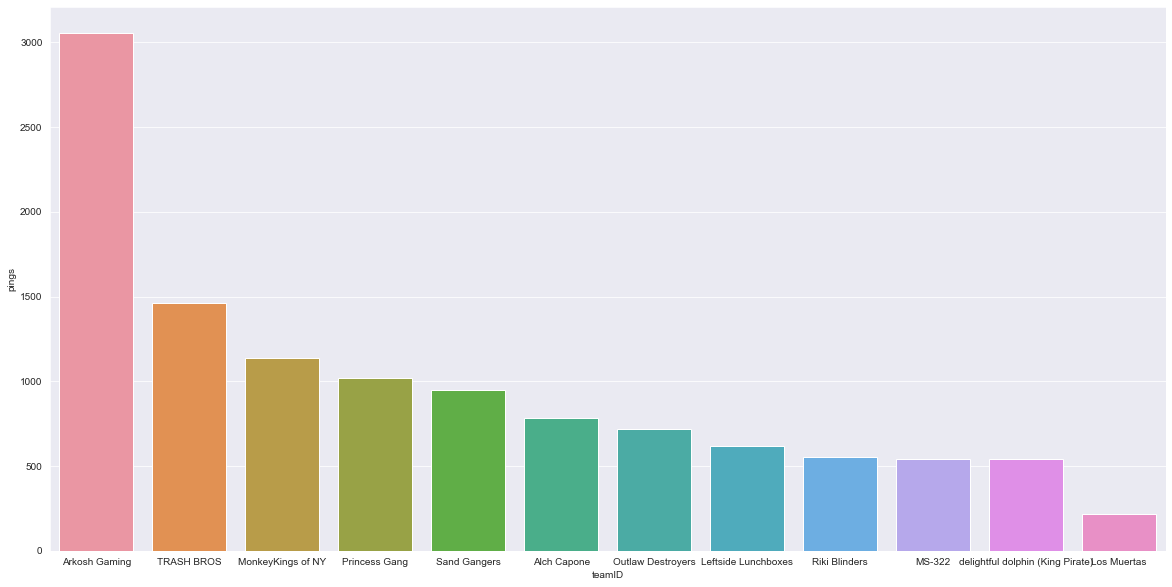

In [7]:
clean.die_pingers(df)

### Did any team actually L E A R N?

Most teams approach the mean during the course of the season with the exception of Sand Gangers and Outlaw Destroyers. Sand Gangers climb though was the most impressive in KDA climbing to a near double cumulative average.

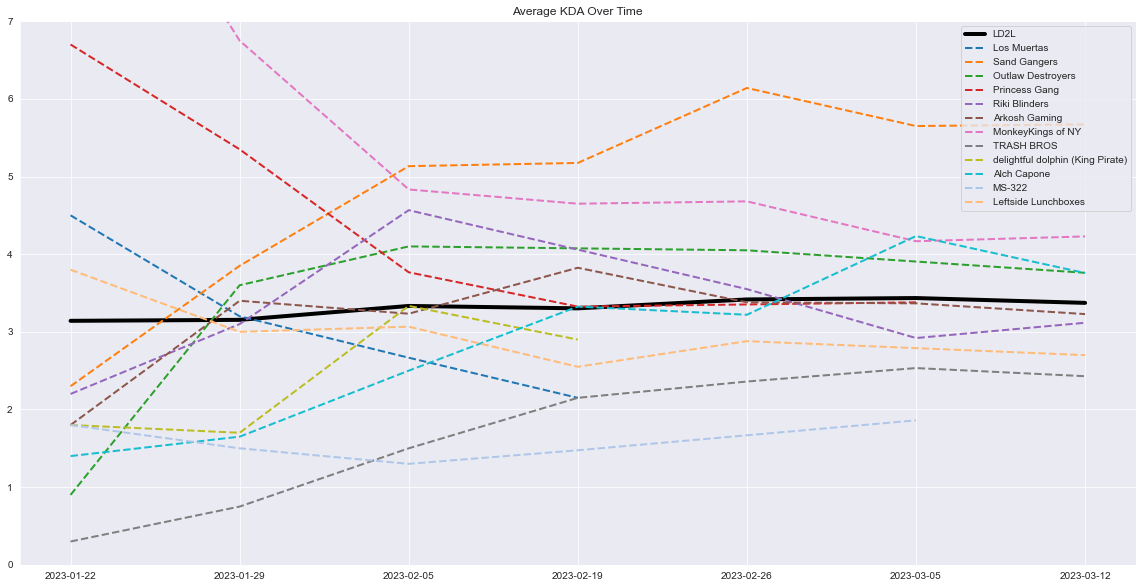

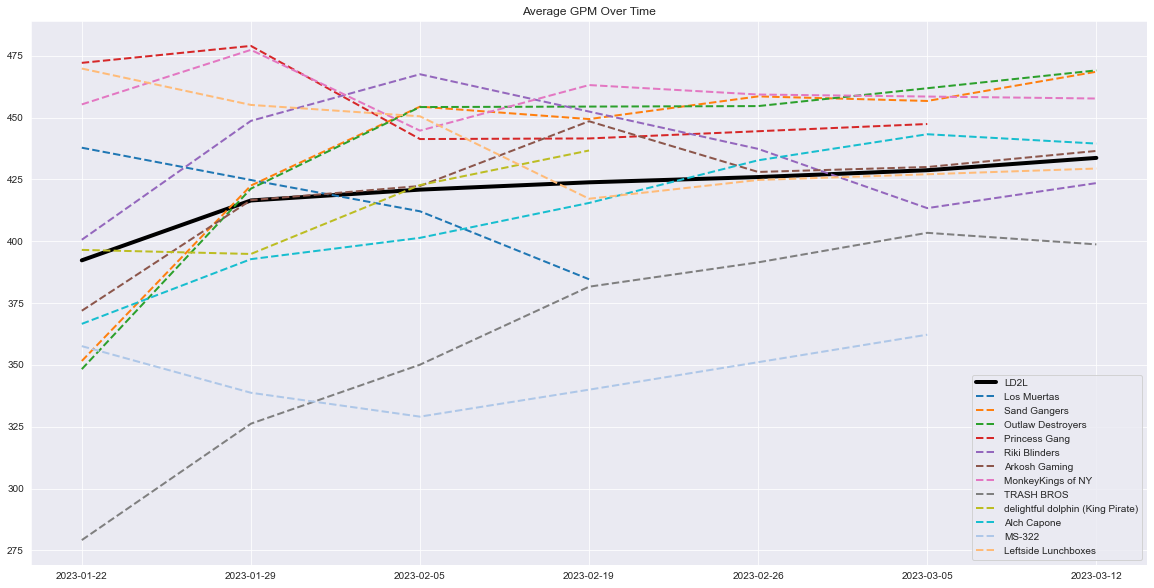

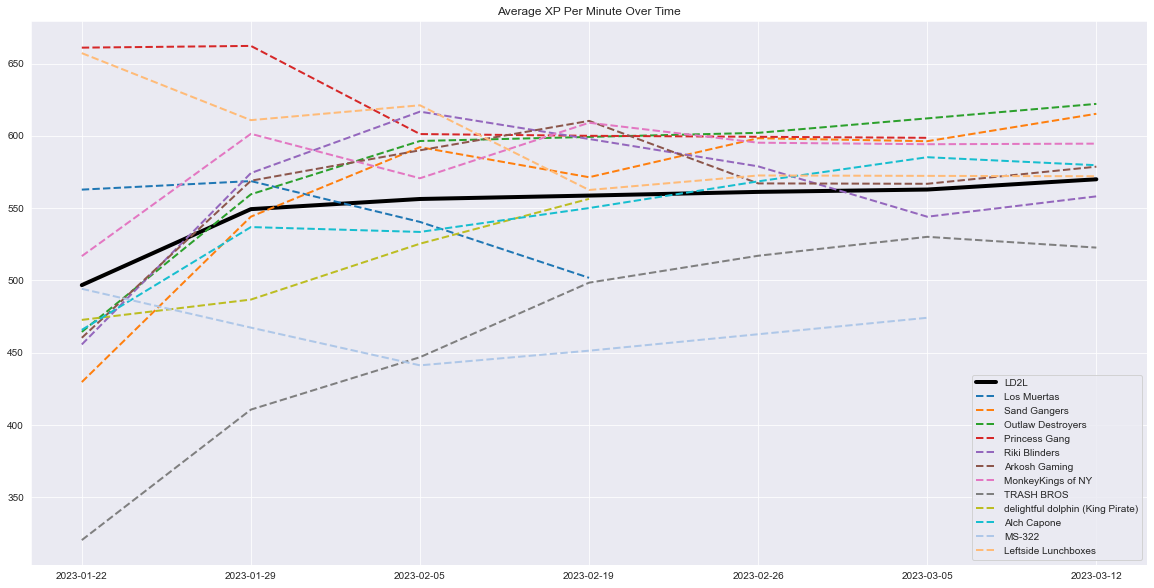

In [8]:
clean.time_series_plotting(df)

### Least valuable players

When it comes to high deaths, that is not necessarily the story for LD2L. For example, my boy Hollywood is averaging 11 deaths per game but has a KDA of 1.75. Then we have players with lower death counts but still extermely low KDAs such as PVC and Rada. Ultimately, Matty Boy (Ye Boi Estupido) seems to be the mathematically worst valued player in the league with the highest deaths, highest average deaths per game and lowest KDA and 10th lowest KDA overall.

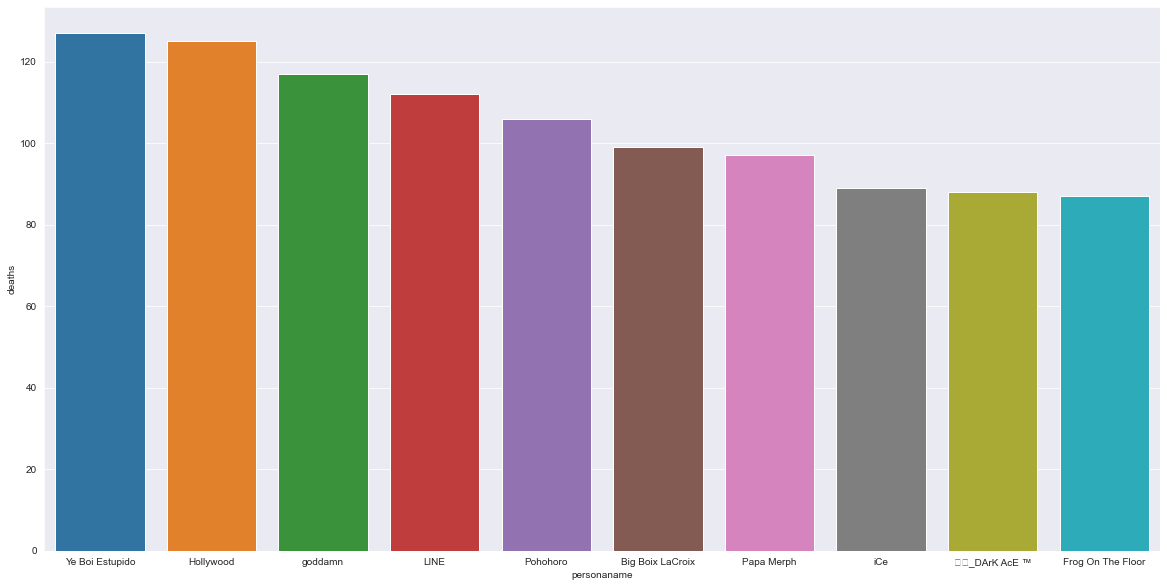

In [9]:
df_deaths = df.groupby('personaname')[['deaths']].sum().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='personaname', y='deaths', data=df_deaths.sort_values('deaths', ascending=False).head(10))
plt.show()

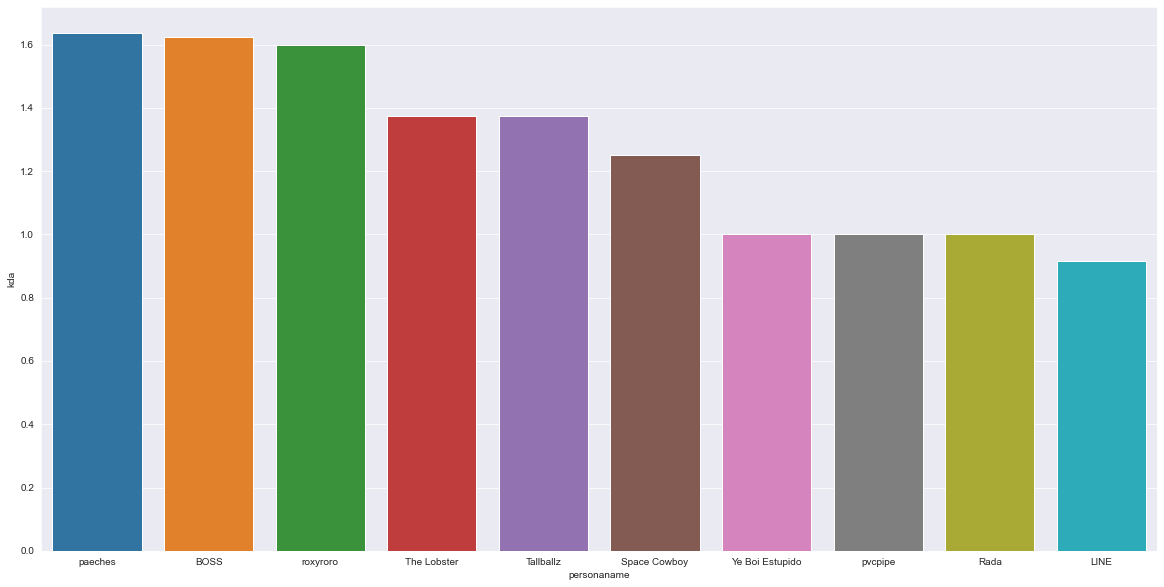

In [10]:
df_kda = df[df['account_id'].isin(df['account_id'].value_counts()[df['account_id'].value_counts() >= 3].index)]


df_kda = df_kda.groupby('personaname')['kda'].mean().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='personaname', y='kda', data=df_kda.sort_values('kda', ascending=False).tail(10))
plt.show()

### KID DYNAMITE KILLED ROSHAN 13 TIMES IN 14 GAMES WTF?!?

Learn to use scan league when?

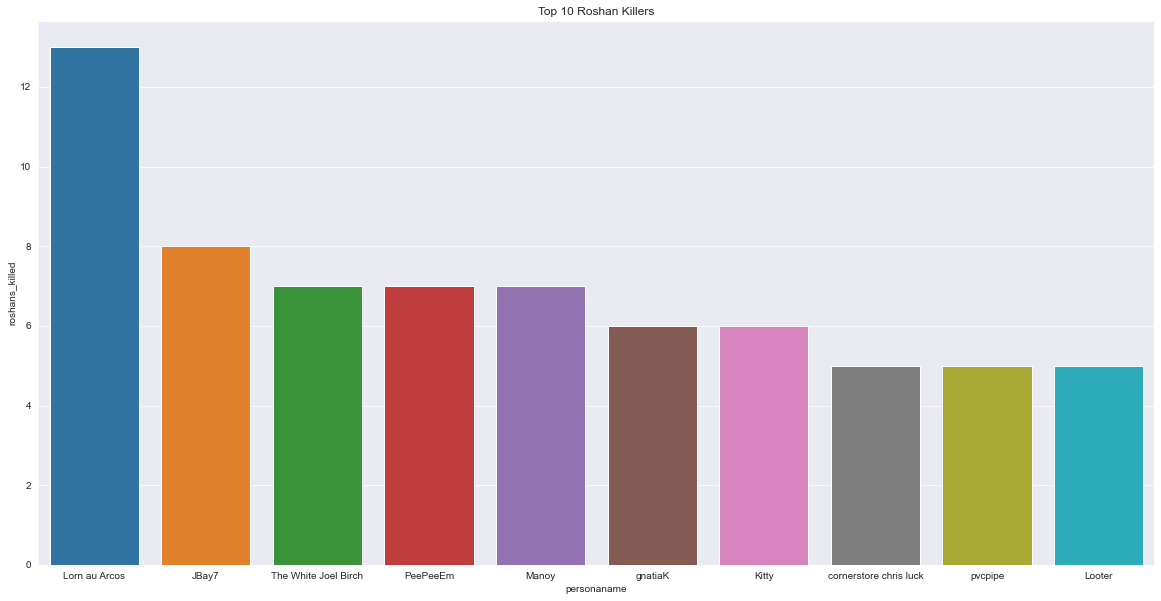

In [11]:
clean.roshan_haters(df)

### STUNNING

I am not sure if this is a good thing or a bad thing but the most common stun in the league is the 0 seconds. The median is 31 and the average is 36. This means a few players really carry the stun timers. Particularly the players listed here.

Somehow, though, Iceman- has the single highest instance of stun time with  263 seconds. I am not sure if this is a bug or if he is just that good but I am going to assume it is a bug, chains should not land that much even in 70 minutes. https://www.opendota.com/matches/7035844208/performances. This whole games stun counter doesnt make sense tbh and I am ashamed of Roxy's performance. Deported.

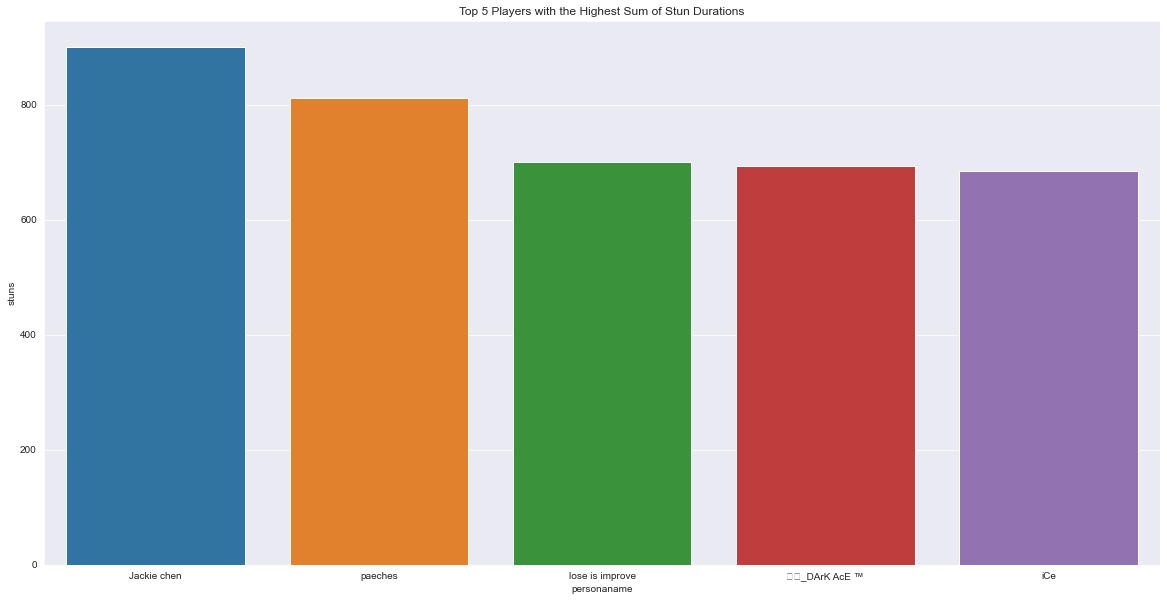

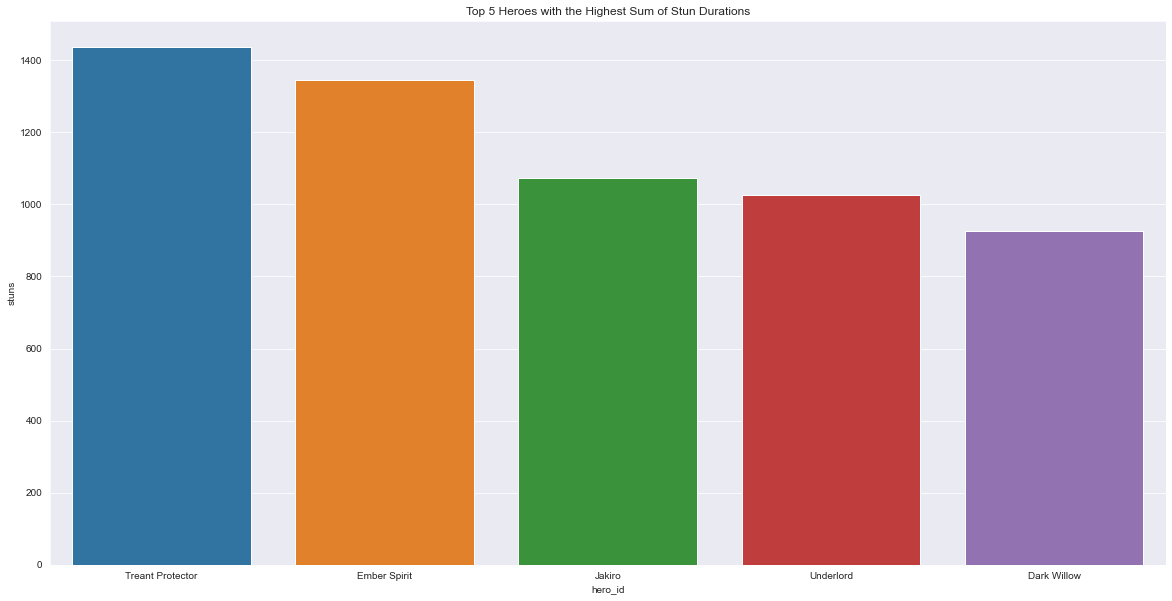

    personaname       hero_id      stuns    match_id
477     Iceman-  Ember Spirit  263.70844  7035844208


In [12]:
clean.numbah_one_stunna(df)

### Hero distribution

Yall really just copied drafts from the Lima Major huh? Really interesting to see high winrate heroes make it through banning. A few of you have lower diversity ranks than standins or King Pirate. Kitty, Jbay and PeePeeEm played the most different heroes but only PeePeeEm had the winrate to boast at 71% Jbay had a solid 50% winrate on recorded matches and Kitty had a 44% winrate across 11 heroes.

I am also very proud to see Molski play more than jakiro this season.

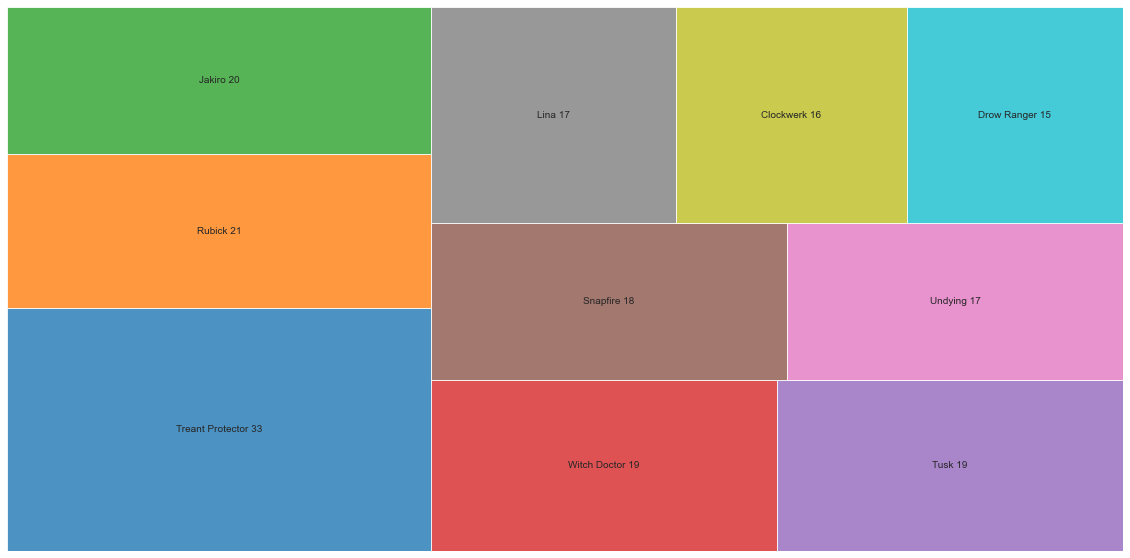

In [13]:
clean.most_common_heroes(df)

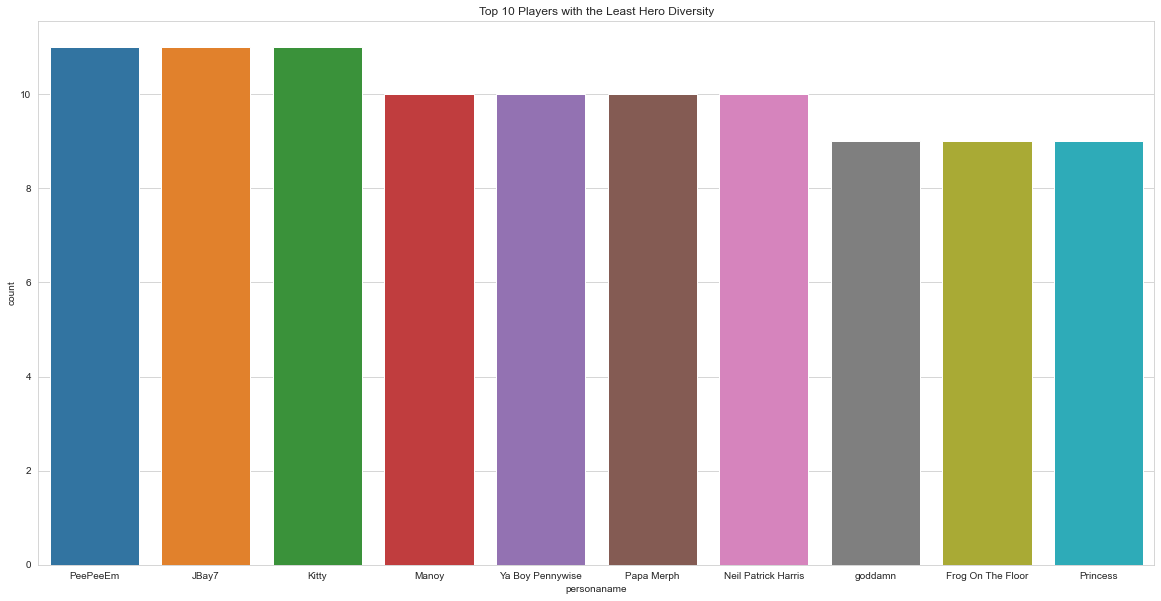

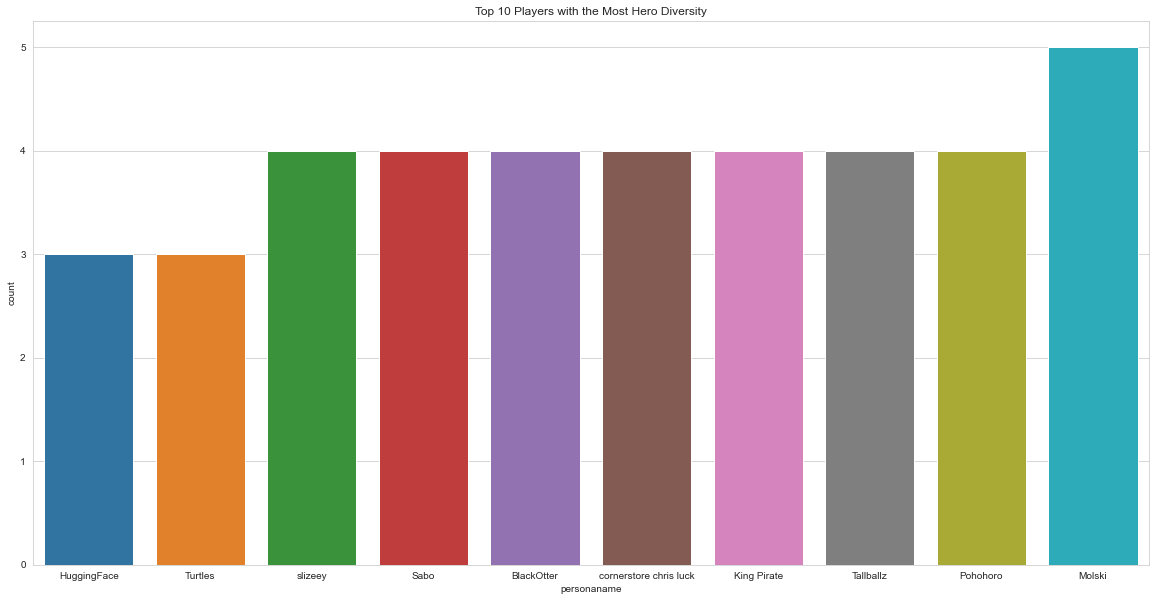

In [14]:
clean.hero_puddle(df)

### Final thoughts

I hope you enjoyed this analysis. I am going to try and do this every season for regular season and I am building a lot of functions to explore the data further. I am also going to build a decision tree ranking system for the next season using this seasons data and try and make predictions.